<span style="color:darkblue">

# "TED International website"에서 트렌드 및 키워드 분석
    
</span>

-------

* 데이터 종류: ted 웹사이트의 제목, 대략 3500개 이상
* 웹스크래핑/웹크롤링 포함여부: YES
* 블로그 코드 활용: NO

-------
### 개요 및 결과

* TED 웹사이트에서 주요 트렌드를 확인하는 프로젝트
* 10년을 단위로 과거와 현재를 분석하면 트렌드의 변화를 파악할 수 있을 것으로 예상
> **결과: 연도별 트렌드 분석 (10년 후 전반적인 비교)**
새롭게 코로나 바이러스에 대한 이야기가 등장하였음 (Covid-19), 사람들은 언제나 삶에 대한 관심이 높음 (Life), 과학과 뇌에 대한 언급이 매우 줄어들었음 (Brain, Science), 기후에 대한 관심이 매우 증가하였음 (Climate), 우주에 대해 관심이 매우 증가하였음 (Universe, Space), 건강에 대한 관심이 매우 증가하였음 (Health), 웹보다는 이젠 인터넷과 기술 쪽으로 다양한 것에 집중하는 것으로 보임 (Web,Internet,Technology)
* 특정 관심있는 분야를 선택할 수 있게 하여 분야별로 각광받는 주제를 알아볼 수 있음
> **결과: 분야별 키워드 분석**
기술과 디자인은 미래와 삶과 관련이 매우 높음 (Future, Life), 기술 클라우드에 있는 단어가 디자인 클라우드에 있는 걸로 보아 디자인은 기술과 밀접한 연관이 있음 (Robot, Build, Technology), 세계는 기후 변화에 매우 큰 관심이 있음 (Climate, Change, Plastic), 난민•여성•전쟁•식량에 대한 이슈가 있다는 걸 알 수 있음 (Refugees, Women, War, Food), 홀로 등장한 국가명을 통해 전세계적으로 중국에 대해 할 말이 많은 것으로 보임 (China)

# 연도별 트렌드 분석

In [1]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')

### 함수 정의

**기간 내의 모든 TED 강의 제목을 추출해주는 함수**

In [2]:
# 시작 연도 & 마지막 연도 & 스타트 페이지를 parameter로 받음

title_list = []

def web_scraping(keyword, second_keyword, start = 1):    # 시작 페이지의 default 값은 1

    while 1:
        
        if keyword <= 2005:    # 웹사이트와 일치하도록 연도에 따라 알맞게 end 값 지정
            end = 1
        elif keyword == 2009 or keyword >= 2013:
            end = 3
        else:
            end = 2

        if start > end :    # 모든 페이지 확인하면 start 값 리셋하고 다음 연도로 이동
            start = 1
            keyword += 1
            
            if keyword > second_keyword:    # 시작 연도가 마지막 연도보다 커지면 while문을 나감
                break
        
        if keyword <= 2014:    
            url ='https://www.ted.com/talks?event={}&page={}&sort=popular'.format(keyword, start)
            
        else:    # 2014년 이후에는 연도 앞에 't'가 붙음
            url ='https://www.ted.com/talks?event=t{}&page={}&sort=popular'.format(keyword, start)
            
        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')

        titles = page.select('a[data-ga-context="talks"]')    # class는 다른 내용도 가져와서 고유한 data-ga-context 사용 
    
        print(titles)    

        for one in titles:
            title_list.append(one.text)
            
        start += 1    # 페이지 증가

# 2001~2010년 분석

### 함수 호출

In [9]:
# 시작 연도와 끝 연도 입력받기

title_list= []
first_keyword = input('시작할 연도를 입력하세요 : ')
last_keyword = input('끝낼 연도를 입력하세요 : ')
print()

web_scraping(int(first_keyword), int(last_keyword))


시작할 연도를 입력하세요 : 2001
끝낼 연도를 입력하세요 : 2010

[<a class=" ga-link" data-ga-context="talks" href="/talks/john_wooden_the_difference_between_winning_and_succeeding">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1056" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/e254295d-fd12-4206-94cc-3c6ebb7923be/JohnWooden_2001-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:36</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/john_wooden_the_difference_between_winning_and_succeeding">
The difference between winning and succeeding
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/eva_zeisel_the_playful_search_for_beauty">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top"

[<a class=" ga-link" data-ga-context="talks" href="/talks/seth_godin_how_to_get_your_ideas_to_spread">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1021" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/71248838-c017-47f6-9dbb-217652b5a70f/SethGodin_2003-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:01</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/seth_godin_how_to_get_your_ideas_to_spread">
How to get your ideas to spread
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/evelyn_glennie_how_to_truly_listen">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1929" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/1d7e013f1870ec08fce3c48348

[<a class=" ga-link" data-ga-context="talks" href="/talks/dan_gilbert_the_surprising_science_of_happiness">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1276" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/016a827cc0757092a0439ab2a63feca8655b6c29_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">21:16</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/dan_gilbert_the_surprising_science_of_happiness">
The surprising science of happiness
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/keith_barry_brain_magic">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1189" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/f6faad19-2457-4e35-903f-02735d

[<a class=" ga-link" data-ga-context="talks" href="/talks/richard_st_john_8_secrets_of_success">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="210" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/9103c5fc-7341-4098-83f2-9549b7b900b8/RichardStJohn_2005-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 3:30</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/richard_st_john_8_secrets_of_success">
8 secrets of success
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/arthur_benjamin_a_performance_of_mathemagic">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="914" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/473e91e4-abab-4fa4-9ac

[<a class=" ga-link" data-ga-context="talks" href="/talks/sir_ken_robinson_do_schools_kill_creativity">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1164" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/6b6eb940bceab359ca676a9b486aae475c1df883_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:24</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sir_ken_robinson_do_schools_kill_creativity">
Do schools kill creativity?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/hans_rosling_the_best_stats_you_ve_ever_seen">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1190" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/91206e56-87be-4387-830b-c

[<a class=" ga-link" data-ga-context="talks" href="/talks/bill_joy_what_i_m_worried_about_what_i_m_excited_about">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1142" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/c1589a0a-bfcb-42e6-96a3-b0298f962f7b/BillJoy_2006-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:02</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bill_joy_what_i_m_worried_about_what_i_m_excited_about">
What I'm worried about, what I'm excited about
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/joe_derisi_solving_medical_mysteries">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="965" src="https://pi.tedcdn.com/r/pe.tedcdn.com

[<a class=" ga-link" data-ga-context="talks" href="/talks/murray_gell_mann_the_ancestor_of_language">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="135" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/44395_480x360.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 2:15</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/murray_gell_mann_the_ancestor_of_language">
The ancestor of language
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/adam_grosser_a_mobile_fridge_for_vaccines">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="211" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/46259_480x360.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span

[<a class=" ga-link" data-ga-context="talks" href="/talks/jill_bolte_taylor_my_stroke_of_insight">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1099" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/eefe30d20338d800bdc70a09dc0f6007e7355a74_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">18:19</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jill_bolte_taylor_my_stroke_of_insight">
My stroke of insight
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/benjamin_zander_the_transformative_power_of_classical_music">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1243" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/0d86f52c-553f-4131-8e48-e8c

[<a class=" ga-link" data-ga-context="talks" href="/talks/isaac_mizrahi_fashion_and_creativity">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="856" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/63ab1c06-711f-4a81-9b53-99579f69d908/IsaacMizrahi_2008-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:16</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/isaac_mizrahi_fashion_and_creativity">
Fashion and creativity
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/roy_gould_curtis_wong_a_preview_of_the_worldwide_telescope">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="402" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/32606_480x360.jpg?qual

[<a class=" ga-link" data-ga-context="talks" href="/talks/mary_roach_10_things_you_didn_t_know_about_orgasm">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1003" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/9153c746-0059-4413-866e-54625c89e4d7/MaryRoach_2009-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:43</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/mary_roach_10_things_you_didn_t_know_about_orgasm">
10 things you didn't know about orgasm
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/elizabeth_gilbert_your_elusive_creative_genius">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1149" src="https://pi.tedcdn.com/r/pe.tedcdn.com/imag

[<a class=" ga-link" data-ga-context="talks" href="/talks/shai_agassi_a_new_ecosystem_for_electric_cars">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1086" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/83223_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">18:06</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/shai_agassi_a_new_ecosystem_for_electric_cars">
A new ecosystem for electric cars
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/diane_benscoter_how_cults_rewire_the_brain">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="384" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/96804_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"><

[<a class=" ga-link" data-ga-context="talks" href="/talks/yves_behar_a_supercharged_motorcycle_design">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="143" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/a0a4a3ffd968fe88a048de5412169850f1a6d910_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 2:23</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/yves_behar_a_supercharged_motorcycle_design">
A supercharged motorcycle design
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/pete_alcorn_the_world_in_2200">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="230" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/94820_800x600.jpg?quality=89&amp;w=320"/><span class=

[<a class=" ga-link" data-ga-context="talks" href="/talks/jonathan_klein_photos_that_changed_the_world">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="362" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/163366_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 6:02</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jonathan_klein_photos_that_changed_the_world">
Photos that changed the world
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/hillel_cooperman_lego_for_grownups">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="350" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/179724_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span>

### 길이 확인

In [11]:
print(len(title_list))

900


### 소문자 통일

In [12]:
make_lower = []
for i in title_list:
    make_lower.append(i.lower())    # 알파벳을 소문자로 변환
    
title_list = make_lower     # 기존의 리스트에 넣음

### 형태소 분석

In [13]:
kkma = Kkma()

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('17', 'NR'), (':', 'SP'), ('36', 'NR')], [('the', 'OL'), ('difference', 'OL'), ('between', 'OL'), ('winning', 'OL'), ('and', 'OL'), ('succeeding', 'OL')], [('18', 'NR'), (':', 'SP'), ('09', 'NR')], [('the', 'OL'), ('playful', 'OL'), ('search', 'OL'), ('for', 'OL'), ('beauty', 'OL')], [('23', 'NR'), (':', 'SP'), ('17', 'NR')], [('poetry', 'OL'), ('of', 'OL'), ('youth', 'OL'), ('and', 'OL'), ('age', 'OL')], [('29', 'NR'), (':', 'SP'), ('10', 'NR')], [('militant', 'OL'), ('atheism', 'OL')], [('22', 'NR'), (':', 'SP'), ('52', 'NR')], [('a', 'OL'), ('theory', 'OL'), ('of', 'OL'), ('everything', 'OL')], [('19', 'NR'), (':', 'SP'), ('11', 'NR')], [('the', 'OL'), ('untouchable', 'OL'), ('music', 'OL'), ('of', 'OL'), ('the', 'OL'), ('theremin', 'OL')], [('15', 'NR'), (':', 'SP'), ('26', 'NR')], [('dangerous', 'OL'), ('memes', 'OL')], [('29', 'NR'), (':', 'SP'), ('42', 'NR')], [('10', 'NR'), ('ways', 'OL'), ('the', 'OL'), ('world', 'OL'), ('could', 'OL'), ('end', 'OL')], [('20', 'NR'), (':', 

### 명사 추출과 불필요한 단어 제거

In [14]:
noun_list = []
# 트렌드 파악에 불필요한 단어 리스트
exclude = ['the','my','myself', 'we','our','ourselves','you','yourself','ideas','themselves', 'string',
           'what','which', 'who','whom','this', 'that', 'they', 'does', 'these', 'those','made', 'way', 
           'are', 'was', 'were', 'have', 'has', 'had', 'having', "that'll",'did','things','the', 'and',
           'but','because', 'until','while','are','for', 'with', 'about','against','between','through',
           'during', 'before','need','see','after','above','below', 'from','down','out','over','world',
           'under','again', 'further','then', 'wish','here', 'there','when', 'where','why','how','you',
           'all', 'any', 'both', 'use', 'ways', 'more','most', 'other', 'some', 'such','no', 'learned',
           'not', 'only', 'own','same', 'than','too', 'very','can', 'will','just','your','being','nor',
           'into',"don't", 'should', "should've", 'now', 'new', 'aren', "aren't", 'how', 'what','make',
           "didn't", "doesn't", 'turn','get', 'haven', "haven't", 'here', 'let','this','like', 'doing',
           'ted', 'mightn', 'you', 'let', 'one','why', 'new', 'could', 'can', 'good', 'better', 'end' ]

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['OL']: 
            noun_list.append(word)    # 명사만 추출

noun_list = [x for x in noun_list if x not in exclude]    # 불필요한 단어 제거

print(noun_list)

['difference', 'winning', 'succeeding', 'playful', 'search', 'beauty', 'poetry', 'of', 'youth', 'age', 'militant', 'atheism', 'a', 'theory', 'of', 'everything', 'untouchable', 'music', 'of', 'theremin', 'dangerous', 'memes', 'robots', 'inspired', 'by', 'cockroach', 'ingenuity', 'human-centered', 'design', 'a', 'master', 'architect', 'asks', 'juggling', 'as', 'art', 'science', 'great', 'cars', 'great', 'art', 'teach', 'arts', 'sciences', 'together', 'juggle', 'jest', 'story', 'of', 'project', 'orion', 'cape', 'breton', 'fiddling', 'in', 'reel', 'time', 'to', 'invent', 'is', 'to', 'give', 'an', 'illustrated', 'journey', 'rome', 'rebuilding', 'a', 'neighborhood', 'beauty', 'dignity', 'hope', 'play', 'experiment', 'discover', 'building', 'uniqueness', 'rethinking', 'sit', 'a', 'memorial', 'at', 'ground', 'zero', 'scenes', 'architect', 's', 'nonprofit', 'transition', 'airstream', 'restyled', 'comics', 'of', 'bygone', 'york', 'camel', 's', 'hump', 'to', 'to', 'spread', 'to', 'truly', 'listen

### 두음절 이상의 단어 추출

In [15]:
print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 2]    # 명사중에서 두음절 이상의 단어 추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  1717

▶ 두음절 이상의 명사의 수 =  1317

['difference', 'winning', 'succeeding', 'playful', 'search', 'beauty', 'poetry', 'youth', 'age', 'militant', 'atheism', 'theory', 'everything', 'untouchable', 'music', 'theremin', 'dangerous', 'memes', 'robots', 'inspired', 'cockroach', 'ingenuity', 'human-centered', 'design', 'master', 'architect', 'asks', 'juggling', 'art', 'science', 'great', 'cars', 'great', 'art', 'teach', 'arts', 'sciences', 'together', 'juggle', 'jest', 'story', 'project', 'orion', 'cape', 'breton', 'fiddling', 'reel', 'time', 'invent', 'give', 'illustrated', 'journey', 'rome', 'rebuilding', 'neighborhood', 'beauty', 'dignity', 'hope', 'play', 'experiment', 'discover', 'building', 'uniqueness', 'rethinking', 'sit', 'memorial', 'ground', 'zero', 'scenes', 'architect', 'nonprofit', 'transition', 'airstream', 'restyled', 'comics', 'bygone', 'york', 'camel', 'hump', 'spread', 'truly', 'listen', 'dreams', 'endangered', 'cultures', 'illusion', 'consciousness', 'societies', 

### 앞글자만 대문자로 변환

**워드 클라우드 만들 때 보기 편함**

In [16]:
make_cap = []
for i in noun_list:
    make_cap.append(i.capitalize())    # 시작만 대문자로 변환
    
noun_list = make_cap

### 단어 출현 횟수 확인

**2001~2010년도여서 before_words로 지정**


In [22]:
counts = Counter(noun_list)

before_words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(before_words)

[('Life', 18), ('Design', 13), ('Art', 13), ('Music', 12), ('Future', 12), ('Science', 10), ('Brain', 8), ('Web', 7), ('Happiness', 7), ('Power', 6), ('Love', 6), ('Beauty', 5), ('Theory', 5), ('Robots', 5), ('Teach', 5), ('Time', 5), ('Human', 5), ('Africa', 5), ('Architecture', 5), ('Magic', 5), ('Lessons', 5), ('Creativity', 5), ('Next', 5), ('Earth', 5), ('Search', 4), ('Story', 4), ('Change', 4), ('Genius', 4), ('Playing', 4), ('Global', 4), ('Revolution', 4), ('Build', 4), ('War', 4), ('Age', 3), ('Cars', 3), ('Journey', 3), ('Building', 3), ('Zero', 3), ('Nature', 3), ('Solar', 3), ('System', 3), ('Birth', 3), ('Flight', 3), ('Energy', 3), ('Lives', 3), ('Face', 3), ('Religion', 3), ('Surprising', 3), ('Psychology', 3), ('Show', 3)]


### Word Cloud 생성

**TED의 색을 넣고 보기 좋게 둥근 사각형으로 처리**

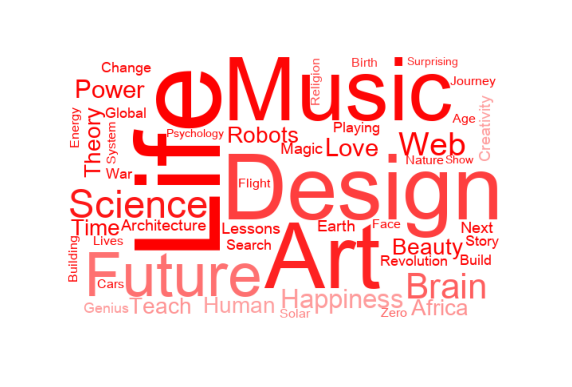

In [27]:
from wordcloud import ImageColorGenerator    # 색 추출 가져오기

cloud_img = plt.imread('rectangle.jpg')    # 모서리가 둥근 사각형 이미지

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                     background_color='white',
                     random_state = 2,    # 비교하기 쉽게 지정
                     color_func = ImageColorGenerator(cloud_img),
                     mask = cloud_img,
                     max_words=100,
                     max_font_size=150,
                     width=1200,
                     height=630)

cloud = wordcloud.generate_from_frequencies(dict(before_words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()

# 2011~2020년 분석

### 함수 호출

In [28]:
# 시작 연도와 끝 연도 입력받기

title_list= []
first_keyword = input('시작할 연도를 입력하세요 : ')
last_keyword = input('끝낼 연도를 입력하세요 : ')
print()

web_scraping(int(first_keyword), int(last_keyword))


시작할 연도를 입력하세요 : 2011
끝낼 연도를 입력하세요 : 2020

[<a class=" ga-link" data-ga-context="talks" href="/talks/sarah_kay_if_i_should_have_a_daughter">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1105" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/ce7fa7dd28cf0770bcdde6b1cba6c865896756ff_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">18:25</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sarah_kay_if_i_should_have_a_daughter">
If I should have a daughter ...
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/matt_cutts_try_something_new_for_30_days">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="207" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uplo

[<a class=" ga-link" data-ga-context="talks" href="/talks/suzanne_lee_grow_your_own_clothes">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="400" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/f4c1700e2f5ff8e8954ab09ffc9709fcf1447262_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 6:40</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/suzanne_lee_grow_your_own_clothes">
Grow your own clothes
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sunni_brown_doodlers_unite">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="350" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/a9f377d0-091b-4974-b0a6-19042473a94f/SunniBrown_2011-embed.jpg?quality=89

[<a class=" ga-link" data-ga-context="talks" href="/talks/susan_cain_the_power_of_introverts">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1144" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/b542b1ddd2e40cfcf9db3430598bc37cebfec8c1_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:04</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/susan_cain_the_power_of_introverts">
The power of introverts
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jon_ronson_strange_answers_to_the_psychopath_test">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1081" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/eaa7589ad922853aaddcb4a4804d4c0b11c66dd5_1600x1200.jpg?qua

[<a class=" ga-link" data-ga-context="talks" href="/talks/billy_collins_everyday_moments_caught_in_time">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="913" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/4d8aaa12-e0dc-4632-bedf-ca1d8d9f0324/BillyCollins_2012-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">15:13</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/billy_collins_everyday_moments_caught_in_time">
Everyday moments, caught in time
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/leymah_gbowee_unlock_the_intelligence_passion_greatness_of_girls">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="879" src="https://pi.tedcdn.com/r/talkstar-phot

[<a class=" ga-link" data-ga-context="talks" href="/talks/hyeonseo_lee_my_escape_from_north_korea">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="735" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/2b3f77f722515fca6436901cb0b9f791beaa938a_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:15</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/hyeonseo_lee_my_escape_from_north_korea">
My escape from North Korea
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/black_my_journey_to_yo_yo_mastery">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="628" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/3e5d2085-5431-412e-8e9e-9a8d1a3f2a23/BLACK_2013

[<a class=" ga-link" data-ga-context="talks" href="/talks/bono_the_good_news_on_poverty_yes_there_s_good_news">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="837" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/518033da-21fb-42d2-bac5-ed7c252dec7b/Bono_2013-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:57</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bono_the_good_news_on_poverty_yes_there_s_good_news">
The good news on poverty (Yes, there's good news)
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sanjay_dastoor_a_skateboard_with_a_boost">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="260" src="https://pi.tedcdn.com/r/pe.tedcdn.com/im

[<a class=" ga-link" data-ga-context="talks" href="/talks/jennifer_granholm_a_clean_energy_proposal_race_to_the_top">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="761" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/6b5276fabd62f23fbf0d6965b9da7ff825d60abb_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:41</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jennifer_granholm_a_clean_energy_proposal_race_to_the_top">
A clean energy proposal — race to the top!
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/diana_reiss_peter_gabriel_neil_gershenfeld_and_vint_cerf_the_interspecies_internet_an_idea_in_progress">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1

[<a class=" ga-link" data-ga-context="talks" href="/talks/rob_knight_how_our_microbes_make_us_who_we_are">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1044" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/d439c4fd8bbfec0e444b820e7e473a09373e5816_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:24</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rob_knight_how_our_microbes_make_us_who_we_are">
How our microbes make us who we are
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/nicholas_negroponte_a_30_year_history_of_the_future">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1183" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/2095

[<a class=" ga-link" data-ga-context="talks" href="/talks/bran_ferren_to_create_for_the_ages_let_s_combine_art_and_engineering">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1212" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/5ffae105-e983-41c1-add7-ef13abc81521/BranFerren_2014-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">20:12</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bran_ferren_to_create_for_the_ages_let_s_combine_art_and_engineering">
To create for the ages, let's combine art and engineering
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/stanley_mcchrystal_the_military_case_for_sharing_knowledge">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" 

[<a class=" ga-link" data-ga-context="talks" href="/talks/bill_gates_the_next_outbreak_we_re_not_ready">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="512" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/2c60223169fd66d3962f9f3c354081824d2914c5_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 8:32</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bill_gates_the_next_outbreak_we_re_not_ready">
The next outbreak? We're not ready
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/monica_lewinsky_the_price_of_shame">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1346" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/7adb146402a457282081af7f165e3912e6bab151_28

[<a class=" ga-link" data-ga-context="talks" href="/talks/alice_goffman_how_we_re_priming_some_kids_for_college_and_others_for_prison">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="964" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/15eec689c9a2eed8c471eb5ce5dda72de49a6cac_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:04</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/alice_goffman_how_we_re_priming_some_kids_for_college_and_others_for_prison">
How we're priming some kids for college — and others for prison
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/paul_tudor_jones_ii_why_we_need_to_rethink_capitalism">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top"

[<a class=" ga-link" data-ga-context="talks" href="/talks/seth_berkley_the_troubling_reason_why_vaccines_are_made_too_late_if_they_re_made_at_all">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="437" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/b226ce62a4f4e1442f252df8481a8930f02d4205_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 7:17</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/seth_berkley_the_troubling_reason_why_vaccines_are_made_too_late_if_they_re_made_at_all">
The troubling reason why vaccines are made too late ... if they're made at all
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/teitur_home_is_a_song_i_ve_always_remembered">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" cl

[<a class=" ga-link" data-ga-context="talks" href="/talks/hugh_evans_what_does_it_mean_to_be_a_citizen_of_the_world">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1016" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/8beb4389-42a6-4f70-a67b-2eb19d194427/HughEvans_2016-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:56</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/hugh_evans_what_does_it_mean_to_be_a_citizen_of_the_world">
What does it mean to be a citizen of the world?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/meron_gribetz_a_glimpse_of_the_future_through_an_augmented_reality_headset">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="

[<a class=" ga-link" data-ga-context="talks" href="/talks/wanda_diaz_merced_how_a_blind_astronomer_found_a_way_to_hear_the_stars">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="675" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/78d43c31-55c6-4cf8-a9a4-3a0a4834150c/WandaDiazMerced_2016-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">11:15</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/wanda_diaz_merced_how_a_blind_astronomer_found_a_way_to_hear_the_stars">
How a blind astronomer found a way to hear the stars
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/chris_milk_the_birth_of_virtual_reality_as_an_art_form">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" c

[<a class=" ga-link" data-ga-context="talks" href="/talks/anab_jain_why_we_need_to_imagine_different_futures">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="881" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/21900ac6-36ad-4748-b256-9e0d6aad5a6b/AnabJain_2017-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:41</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/anab_jain_why_we_need_to_imagine_different_futures">
Why we need to imagine different futures
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/garry_kasparov_don_t_fear_intelligent_machines_work_with_them">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="920" src="https://pi.tedcdn.com/r/ta

[<a class=" ga-link" data-ga-context="talks" href="/talks/anthony_d_romero_this_is_what_democracy_looks_like">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="768" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/c8e80417-11e0-49e5-85c4-65f036a3671f/AnthonyDRomero_2017-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:48</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/anthony_d_romero_this_is_what_democracy_looks_like">
This is what democracy looks like
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/devita_davison_how_urban_agriculture_is_transforming_detroit">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="742" src="https://pi.tedcdn.com/r/talk

[<a class=" ga-link" data-ga-context="talks" href="/talks/alex_honnold_how_i_climbed_a_3_000_foot_vertical_cliff_without_ropes">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="709" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/0cbe558f-0c66-497a-9102-4e888509823f/AlexHonnold_2018-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">11:49</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/alex_honnold_how_i_climbed_a_3_000_foot_vertical_cliff_without_ropes">
How I climbed a 3,000-foot vertical cliff — without ropes
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/karen_j_meech_the_story_of_oumuamua_the_first_visitor_from_another_star_system">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" cl

[<a class=" ga-link" data-ga-context="talks" href="/talks/tamekia_mizladi_smith_how_to_train_employees_to_have_difficult_conversations">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="490" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/93dcf66f-4923-44b8-a554-22bf3d48beae/TamekiaMizLadiSmith_2018-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 8:10</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/tamekia_mizladi_smith_how_to_train_employees_to_have_difficult_conversations">
How to train employees to have difficult conversations
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/supasorn_suwajanakorn_fake_videos_of_real_people_and_how_to_spot_them">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><i

[<a class=" ga-link" data-ga-context="talks" href="/talks/vishaan_chakrabarti_how_we_can_design_timeless_cities_for_our_collective_future">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="793" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/7b613d24-fbfc-4979-8591-ffc5558eb989/VishaanChakrabarti_2018-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:13</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/vishaan_chakrabarti_how_we_can_design_timeless_cities_for_our_collective_future">
How we can design timeless cities for our collective future
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/caroline_harper_what_if_we_eliminated_one_of_the_world_s_oldest_diseases">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thum

[<a class=" ga-link" data-ga-context="talks" href="/talks/matt_walker_sleep_is_your_superpower">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1158" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/0a95ffba-8cfe-4d9c-8913-736275f78bf9/MatthewWalker_2019-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:18</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/matt_walker_sleep_is_your_superpower">
Sleep is your superpower
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/katie_hood_the_difference_between_healthy_and_unhealthy_love">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="733" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/

[<a class=" ga-link" data-ga-context="talks" href="/talks/kishore_mahbubani_how_the_west_can_adapt_to_a_rising_asia">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1073" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/a87cfa75-6934-4843-b30b-0a4f90717a0c/KishoreMahbubani_2019-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:53</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/kishore_mahbubani_how_the_west_can_adapt_to_a_rising_asia">
How the West can adapt to a rising Asia
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/david_deutsch_after_billions_of_years_of_monotony_the_universe_is_waking_up">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="

[<a class=" ga-link" data-ga-context="talks" href="/talks/brandon_clifford_architectural_secrets_of_the_world_s_ancient_wonders">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="262" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/dd0c9572-c54f-4f7f-b89e-09200d26213f/BrandonClifford_2019U-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 4:22</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/brandon_clifford_architectural_secrets_of_the_world_s_ancient_wonders">
Architectural secrets of the world's ancient wonders
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/arnav_kapur_how_ai_could_become_an_extension_of_your_mind">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image"

[<a class=" ga-link" data-ga-context="talks" href="/talks/ethan_hawke_give_yourself_permission_to_be_creative">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="556" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/36bdc0e8-c3d9-47db-96c0-3b159405285d/EthanHawke_2020S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 9:16</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ethan_hawke_give_yourself_permission_to_be_creative">
Give yourself permission to be creative
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ibram_x_kendi_the_difference_between_being_not_racist_and_antiracist">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="3074" src="https://pi.ted

[<a class=" ga-link" data-ga-context="talks" href="/talks/ariel_waldman_the_invisible_life_hidden_beneath_antarctica_s_ice">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="356" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/33031c81-29e6-4286-9e69-517a500b34b9/ArielWaldman_2020S_embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 5:56</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ariel_waldman_the_invisible_life_hidden_beneath_antarctica_s_ice">
The invisible life hidden beneath Antarctica's ice
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jeremy_brewer_a_strategy_for_supporting_and_listening_to_others">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="to

[<a class=" ga-link" data-ga-context="talks" href="/talks/rufus_wainwright_peaceful_afternoon_going_to_a_town">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="574" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/fe143e4c-f3a6-4b99-a746-a042e47fa08e/RufusWainwright_2020S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 9:34</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rufus_wainwright_peaceful_afternoon_going_to_a_town">
"Peaceful Afternoon" / "Going To A Town"
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/abena_koomson_davis_people_get_ready_love_s_in_need_of_love_today">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="432" src="https://pi.t

### 길이 확인

In [29]:
print(len(title_list))

1638


### 소문자 통일

In [30]:
make_lower = []
for i in title_list:
    make_lower.append(i.lower())    # 알파벳을 소문자로 변환
    
title_list = make_lower     # 기존의 리스트에 넣음

### 형태소 분석

In [31]:
kkma = Kkma()

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('18', 'NR'), (':', 'SP'), ('25', 'NR')], [('if', 'OL'), ('i', 'OL'), ('should', 'OL'), ('have', 'OL'), ('a', 'OL'), ('daughter', 'OL'), ('...', 'SE')], [('3', 'NR'), (':', 'SP'), ('27', 'NR')], [('try', 'OL'), ('something', 'OL'), ('new', 'OL'), ('for', 'OL'), ('30', 'NR'), ('days', 'OL')], [('17', 'NR'), (':', 'SP'), ('40', 'NR')], [('the', 'OL'), ('history', 'OL'), ('of', 'OL'), ('our', 'OL'), ('world', 'OL'), ('in', 'OL'), ('18', 'NR'), ('minutes', 'OL')], [('5', 'NR'), (':', 'SP'), ('02', 'NR')], [('3', 'NR'), ('things', 'OL'), ('i', 'OL'), ('learned', 'OL'), ('while', 'OL'), ('my', 'OL'), ('plane', 'OL'), ('crashed', 'OL')], [('7', 'NR'), (':', 'SP'), ('26', 'NR')], [('the', 'OL'), ('hidden', 'OL'), ('power', 'OL'), ('of', 'OL'), ('smiling', 'OL')], [('20', 'NR'), (':', 'SP'), ('27', 'NR')], [('let', 'OL'), ("'", 'SS'), ('s', 'OL'), ('use', 'OL'), ('video', 'OL'), ('to', 'OL'), ('reinvent', 'OL'), ('education', 'OL')], [('9', 'NR'), (':', 'SP'), ('04', 'NR')], [('beware', 'OL')

### 명사 추출과 불필요한 단어 제거

In [32]:
noun_list = []
# 트렌드 파악에 불필요한 단어 리스트
exclude = ['the','my','myself', 'we','our','ourselves','you','yourself','ideas','themselves', 'string',
           'what','which', 'who','whom','this', 'that', 'they', 'does', 'these', 'those','made', 'way', 
           'are', 'was', 'were', 'have', 'has', 'had', 'having', "that'll",'did','things','the', 'and',
           'but','because', 'until','while','are','for', 'with', 'about','against','between','through',
           'during', 'before','need','see','after','above','below', 'from','down','out','over','world',
           'under','again', 'further','then', 'wish','here', 'there','when', 'where','why','how','you',
           'all', 'any', 'both', 'use', 'ways', 'more','most', 'other', 'some', 'such','no', 'learned',
           'not', 'only', 'own','same', 'than','too', 'very','can', 'will','just','your','being','nor',
           'into',"don't", 'should', "should've", 'now', 'new', 'aren', "aren't", 'how', 'what','make',
           "didn't", "doesn't", 'turn','get', 'haven', "haven't", 'here', 'let','this','like', 'doing',
           'ted', 'mightn', 'you', 'let', 'one','why', 'new', 'could', 'can', 'good', 'better', 'end' ]

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['OL']: 
            noun_list.append(word)    # 명사만 추출

noun_list = [x for x in noun_list if x not in exclude]    # 불필요한 단어 제거

print(noun_list)


['if', 'i', 'a', 'daughter', 'try', 'something', 'days', 'history', 'of', 'in', 'minutes', 'i', 'plane', 'crashed', 'hidden', 'power', 'of', 'smiling', 's', 'video', 'to', 'reinvent', 'education', 'beware', 'online', 'filter', 'bubbles', 'less', 'stuff', 'happiness', 'on', 'wrong', 'a', 'virtual', 'choir', 'voices', 'strong', 'building', 'a', 'dinosaur', 'a', 'chicken', 'a', 'life', 'lesson', 'a', 'volunteer', 'firefighter', 'art', 'to', 'inside', 'google', 's', 'driverless', 'car', 'listen', 'learn', 'lead', 'printing', 'a', 'human', 'kidney', 'birth', 'of', 'a', 'word', 'greatest', 'talk', 'ever', 'sold', 'demise', 'of', 'guys', 'animal', 'tales', 'icy', 'wonderlands', 'hidden', 'beauty', 'of', 'pollination', 'taking', 'imagination', 'seriously', 'different', 'of', 'knowing', 'quest', 'to', 'understand', 'consciousness', 'a', 'rosetta', 'stone', 'a', 'lost', 'language', 'state', 'budgets', 'breaking', 'us', 'schools', 'mystery', 'of', 'chronic', 'pain', 'genius', 'puppetry', 'behind'

### 두음절 이상의 단어 추출

In [33]:
print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 2]    # 명사중에서 두음절 이상의 단어 추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  4320

▶ 두음절 이상의 명사의 수 =  3188

['daughter', 'try', 'something', 'days', 'history', 'minutes', 'plane', 'crashed', 'hidden', 'power', 'smiling', 'video', 'reinvent', 'education', 'beware', 'online', 'filter', 'bubbles', 'less', 'stuff', 'happiness', 'wrong', 'virtual', 'choir', 'voices', 'strong', 'building', 'dinosaur', 'chicken', 'life', 'lesson', 'volunteer', 'firefighter', 'art', 'inside', 'google', 'driverless', 'car', 'listen', 'learn', 'lead', 'printing', 'human', 'kidney', 'birth', 'word', 'greatest', 'talk', 'ever', 'sold', 'demise', 'guys', 'animal', 'tales', 'icy', 'wonderlands', 'hidden', 'beauty', 'pollination', 'taking', 'imagination', 'seriously', 'different', 'knowing', 'quest', 'understand', 'consciousness', 'rosetta', 'stone', 'lost', 'language', 'state', 'budgets', 'breaking', 'schools', 'mystery', 'chronic', 'pain', 'genius', 'puppetry', 'behind', 'war', 'horse', 'open-sourced', 'blueprints', 'civilization', 'building', 'seed', 'cathedral', 'visualizing

### 앞글자만 대문자로 변환

**워드 클라우드 만들 때 보기 편함**

In [34]:
make_cap = []
for i in noun_list:
    make_cap.append(i.capitalize())    # 시작만 대문자로 변환
    
noun_list = make_cap

### 단어 출현 횟수 확인

**2011~2020년도여서 after_words로 지정**


In [36]:
counts = Counter(noun_list)

after_words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(after_words)

[('Life', 32), ('Future', 31), ('Art', 22), ('Change', 19), ('Time', 15), ('Climate', 15), ('Human', 14), ('Love', 14), ('Build', 13), ('Power', 12), ('Inside', 12), ('Internet', 12), ('Help', 12), ('History', 11), ('People', 11), ('Universe', 10), ('Live', 10), ('Next', 10), ('Building', 9), ('Technology', 9), ('Cities', 9), ('Hidden', 8), ('Learn', 8), ('Talk', 8), ('Story', 8), ('Music', 8), ('Earth', 8), ('Reality', 8), ('Fight', 8), ('Secret', 8), ('Health', 8), ('Design', 7), ('Space', 7), ('Mind', 7), ('Think', 7), ('Robot', 7), ('Work', 7), ('System', 7), ('Covid-19', 7), ('Video', 6), ('Language', 6), ('Digital', 6), ('Grow', 6), ('Ready', 6), ('Science', 6), ('Blind', 6), ('Ancient', 6), ('Stop', 6), ('First', 6), ('City', 6)]


### Word Cloud 생성

**TED의 색을 넣고 보기 좋게 둥근 사각형으로 처리**

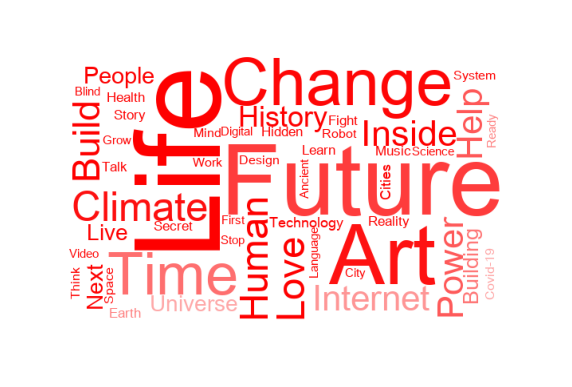

In [39]:
from wordcloud import ImageColorGenerator    # 색 추출 가져오기

cloud_img = plt.imread('rectangle.jpg')    # 모서리가 둥근 사각형 이미지

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                     background_color='white',
                     random_state = 2,    # 비교하기 쉽게 지정
                     color_func = ImageColorGenerator(cloud_img),
                     mask = cloud_img,
                     max_words=100,
                     max_font_size=150,
                     width=1200,
                     height=630)

cloud = wordcloud.generate_from_frequencies(dict(after_words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()

# 결론


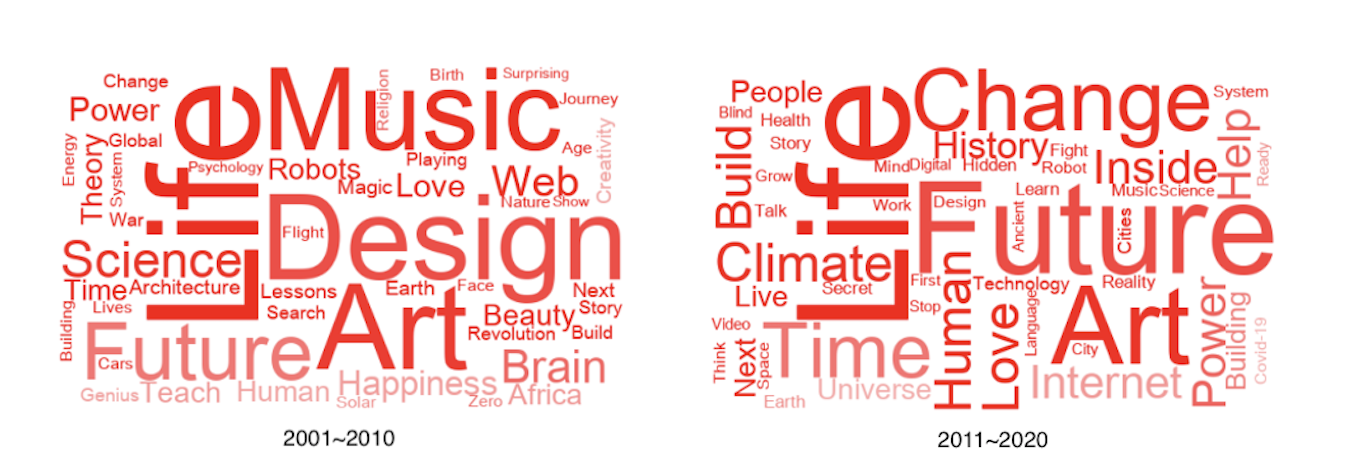

### 10년 후 전반적인 비교
* 사람들은 언제나 삶에 대한 관심이 높음 (Life) 
* 과학과 뇌에 대한 언급이 매우 줄어들었음 (Brain, Science) 
* 기후에 대한 관심이 매우 증가하였음 (Climate)
* 우주에 대해 관심이 매우 증가하였음 (Universe, Space)
* 새롭게 코로나 바이러스에 대한 이야기가 등장하였음 (Covid-19)
* 건강에 대한 관심이 매우 증가하였음 (Health)
* 웹보다는 이젠 인터넷과 기술 쪽으로 다양한 것에 집중하는 것으로 보임 (Web,Internet,Technology)

### 이와 같이 다양한 분석을 해볼 수 있었음 

# 분야별 트렌드 분석

### 함수 정의

In [2]:
# 시작 연도 & 스타트 페이지를 parameter로 받음

title_list_2 = []

def web_scraping_2(topic, start = 1):    # 시작 페이지의 default 값은 1

    while 1:
        
        url ='https://www.ted.com/talks?page={}&sort=newest&topics%5B%5D={}'.format(start, topic)
            
        req = requests.get(url)    # 해당 페이지를 가져옴

        page_2 = BeautifulSoup(req.text, 'html.parser')

        titles_2 = page_2.select('a[data-ga-context="talks"]')    # class는 다른 내용도 가져와서 고유한 data-ga-context 사용 
        
        if not titles_2:    # 더이상 제목이 없으면 (페이지 끝) 탈출
            break
            
        print(titles_2)    

        for one in titles_2:
            title_list_2.append(one.text)
            
        start += 1    # 페이지 증가

### 함수 호출

In [47]:
title_list_2 = []
topic_select = input("주제:")
web_scraping_2(topic_select)

주제:Technology
[<a class=" ga-link" data-ga-context="talks" href="/talks/aaron_morris_the_future_diagnostic_lab_inside_your_body">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="319" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/a18fbf7c-0ea1-4769-9fd7-d200183c7c16/AaronMorris_2021F-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 5:19</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/aaron_morris_the_future_diagnostic_lab_inside_your_body">
The future diagnostic lab ... inside your body
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/brittany_young_how_dirt_bikes_and_stem_ignite_ingenuity_in_baltimore">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" p

[<a class=" ga-link" data-ga-context="talks" href="/talks/emily_levesque_a_stellar_history_of_modern_astronomy">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="920" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/56674469-55a9-47ed-928b-66e366540fc0/EmilyLevesque_2020X-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">15:20</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/emily_levesque_a_stellar_history_of_modern_astronomy">
A stellar history of modern astronomy
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sharon_weinberger_inside_the_massive_and_unregulated_world_of_surveillance_tech">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="683" src="h

[<a class=" ga-link" data-ga-context="talks" href="/talks/ben_pring_the_new_jobs_of_the_future_and_other_insights_on_the_changing_workforce">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1156" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/a9fe0389-a3a2-43a9-a067-bbe79eb78304/BenPring_2020S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:16</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ben_pring_the_new_jobs_of_the_future_and_other_insights_on_the_changing_workforce">
The new jobs of the future, and other insights on the changing workforce
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/nitish_padmanaban_autofocusing_reading_glasses_of_the_future">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__

[<a class=" ga-link" data-ga-context="talks" href="/talks/sonia_livingstone_parenting_in_the_digital_age">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="723" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/91ec0509-64c7-4c32-83f5-013bc3114ad7/SoniaLivingstone_2019T-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:03</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sonia_livingstone_parenting_in_the_digital_age">
Parenting in the digital age	
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/priscilla_pemu_a_personal_health_coach_for_those_living_with_chronic_diseases">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="469" src="https://pi.tedcdn.co

[<a class=" ga-link" data-ga-context="talks" href="/talks/zohreh_davoudi_are_we_living_in_a_simulation">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="249" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/cc488ad9-5f2e-45f6-bd45-cc20ae0eaeaa/universesimulation_textless.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 4:09</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/zohreh_davoudi_are_we_living_in_a_simulation">
Are we living in a simulation?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/herman_narula_the_transformative_power_of_video_games">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="720" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazo

[<a class=" ga-link" data-ga-context="talks" href="/talks/arnav_kapur_how_ai_could_become_an_extension_of_your_mind">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="538" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/c2159c67-7865-479c-8319-0f5ca5a7b927/ArnavKapur_2019U-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 8:58</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/arnav_kapur_how_ai_could_become_an_extension_of_your_mind">
How AI could become an extension of your mind
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/carson_bruns_could_a_tattoo_help_you_stay_healthy">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="658" src="https://pi.tedcd

[<a class=" ga-link" data-ga-context="talks" href="/talks/glenn_cantave_the_case_for_ar_and_vr_in_activism">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="889" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/ba5c53e6-c7db-4f44-a354-61512856356e/Glenn+Cantave.jpeg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:49</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/glenn_cantave_the_case_for_ar_and_vr_in_activism">
The case for AR and VR in activism
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/anirudh_sharma_ink_made_of_air_pollution">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="504" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploa

[<a class=" ga-link" data-ga-context="talks" href="/talks/ashwini_anburajan_how_cryptocurrency_can_help_start_ups_get_investment_capital">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="398" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/5ff97e5c-29a4-42bd-b119-e3a5326f2782/AshwiniAnburajan_2018S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 6:38</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ashwini_anburajan_how_cryptocurrency_can_help_start_ups_get_investment_capital">
How cryptocurrency can help start-ups get investment capital
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/hany_farid_the_dangers_of_algorithmic_justice">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=

[<a class=" ga-link" data-ga-context="talks" href="/talks/reed_hastings_how_netflix_changed_entertainment_and_where_it_s_headed">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1251" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/c522c185-3484-43d4-bac9-654dc4beb6e1/ReedHastings_2018-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">20:51</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/reed_hastings_how_netflix_changed_entertainment_and_where_it_s_headed">
How Netflix changed entertainment — and where it's headed
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/poppy_crum_technology_that_knows_what_you_re_feeling">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" cr

[<a class=" ga-link" data-ga-context="talks" href="/talks/robin_hauser_can_we_protect_ai_from_our_biases">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="744" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/08fdb526-5c60-433e-a3df-bbcbd20ba3a8/RobinHauser_2017S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:24</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/robin_hauser_can_we_protect_ai_from_our_biases">
Can we protect AI from our biases?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rana_novack_how_we_ll_predict_the_next_refugee_crisis">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="739" src="https://pi.tedcdn.com/r/talkstar-photos.s3.a

[<a class=" ga-link" data-ga-context="talks" href="/talks/lana_yarosh_how_technology_can_reconnect_parents_and_kids">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1158" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/58b00cde-d3c0-4359-b5bb-df6b2b5595ef/Lana+Yarosh.jpeg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:18</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/lana_yarosh_how_technology_can_reconnect_parents_and_kids">
How technology can reconnect parents and kids
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/tim_kruger_can_we_stop_climate_change_by_removing_co2_from_the_air">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="536" src="https://

[<a class=" ga-link" data-ga-context="talks" href="/talks/laura_galante_how_and_why_russia_hacked_the_us_election">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="573" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/1de67d01-48a0-4d5d-9ae7-3637164bd1d6/LauraGalante_2017-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 9:33</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/laura_galante_how_and_why_russia_hacked_the_us_election">
How (and why) Russia hacked the US election
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/elon_musk_the_future_we_re_building_and_boring">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="2450" src="https://pi.tedcdn.com/r

[<a class=" ga-link" data-ga-context="talks" href="/talks/steven_johnson_the_playful_wonderland_behind_great_inventions">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="445" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/722585fb-b09a-42f2-9f84-bf0d410667a9/StevenJohnson_2016V-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 7:25</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/steven_johnson_the_playful_wonderland_behind_great_inventions">
The playful wonderland behind great inventions
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bettina_warburg_how_the_blockchain_will_radically_transform_the_economy">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top

[<a class=" ga-link" data-ga-context="talks" href="/talks/chris_milk_the_birth_of_virtual_reality_as_an_art_form">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1054" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/3aac8572-63c2-4e8e-a331-31fab968b0d9/ChrisMilk_2016-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:34</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/chris_milk_the_birth_of_virtual_reality_as_an_art_form">
The birth of virtual reality as an art form
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/andrew_pelling_this_scientist_makes_ears_out_of_apples">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="425" src="https://pi.tedcdn.co

[<a class=" ga-link" data-ga-context="talks" href="/talks/harry_cliff_have_we_reached_the_end_of_physics">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="837" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/6deca22c-2606-4b52-8ddb-984e991a1946/HarryCliff_2015G-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:57</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/harry_cliff_have_we_reached_the_end_of_physics">
Have we reached the end of physics?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rodrigo_bijou_governments_don_t_understand_cyber_warfare_we_need_hackers">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="568" src="https://pi.tedcdn.com/r/t

[<a class=" ga-link" data-ga-context="talks" href="/talks/dame_stephanie_shirley_why_do_ambitious_women_have_flat_heads">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="819" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/8a688129c4d6b700b4581a83626d73bfd8fc9691_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:39</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/dame_stephanie_shirley_why_do_ambitious_women_have_flat_heads">
Why do ambitious women have flat heads?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1078" src="https://pi.tedcdn.com/r/p

[<a class=" ga-link" data-ga-context="talks" href="/talks/jeremy_heimans_what_new_power_looks_like">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="908" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/89afe044196c7a874b6d87a780b45219d81476ce_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">15:08</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jeremy_heimans_what_new_power_looks_like">
What new power looks like
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sergei_lupashin_a_flying_camera_on_a_leash">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="383" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/10126c828948ca0df05d84d792885a35be74a5a3_2880x1620.jp

[<a class=" ga-link" data-ga-context="talks" href="/talks/vishal_sikka_the_beauty_and_power_of_algorithms">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="645" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/d28f1f92-aa72-4666-9e00-5ab23f01e5f1/VishalSikka_2013S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">10:45</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/vishal_sikka_the_beauty_and_power_of_algorithms">
The beauty and power of algorithms
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/leslie_perlow_thriving_in_an_overconnected_world">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="826" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amaz

[<a class=" ga-link" data-ga-context="talks" href="/talks/raffaello_d_andrea_the_astounding_athletic_power_of_quadcopters">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="968" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/e15213155418fc82875680062821e32eccd30a5f_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:08</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/raffaello_d_andrea_the_astounding_athletic_power_of_quadcopters">
The astounding athletic power of quadcopters
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/david_j_malan_what_s_an_algorithm">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="282" src="https://pi.tedcdn.com/r/talkstar-photos.s3.ama

[<a class=" ga-link" data-ga-context="talks" href="/talks/danny_hillis_the_internet_could_crash_we_need_a_plan_b">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="751" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/fc7b6c0a7974f84b6fd218a3409eb5248d214aad_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:31</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/danny_hillis_the_internet_could_crash_we_need_a_plan_b">
The Internet could crash. We need a Plan B
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/catarina_mota_play_with_smart_materials">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="595" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/74ce5adfd6b

[<a class=" ga-link" data-ga-context="talks" href="/talks/ramesh_raskar_imaging_at_a_trillion_frames_per_second">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="662" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/2017a955b9e46bb6fdcffb4982210284d4260483_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">11:02</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ramesh_raskar_imaging_at_a_trillion_frames_per_second">
Imaging at a trillion frames per second
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/malte_spitz_your_phone_company_is_watching">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="596" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploa

[<a class=" ga-link" data-ga-context="talks" href="/talks/ayah_bdeir_building_blocks_that_blink_beep_and_teach">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="327" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/5f8c772d-748e-4ac0-b054-0ab535ad4124/AyahBdeir_2012U-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 5:27</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ayah_bdeir_building_blocks_that_blink_beep_and_teach">
Building blocks that blink, beep and teach
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/regina_dugan_from_mach_20_glider_to_hummingbird_drone">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1501" src="https://pi.tedcdn.com/r/p

[<a class=" ga-link" data-ga-context="talks" href="/talks/john_bohannon_dance_vs_powerpoint_a_modest_proposal">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="677" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/0e03ea9f2ebfb296876631312a61ab67c07030d0_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">11:17</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/john_bohannon_dance_vs_powerpoint_a_modest_proposal">
Dance vs. powerpoint, a modest proposal
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/joe_sabia_the_technology_of_storytelling">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="231" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/7ac

[<a class=" ga-link" data-ga-context="talks" href="/talks/dave_debronkart_meet_e_patient_dave">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="991" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/f88e5356ce534bda61de99617beaaebce332c71a_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:31</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/dave_debronkart_meet_e_patient_dave">
Meet e-Patient Dave
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/honor_harger_a_history_of_the_universe_in_sound">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="676" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/f45abccb79f68f69f7d4b06c29a7f5be8f25b32b_800x600.jpg?quality=89&am

[<a class=" ga-link" data-ga-context="talks" href="/talks/anders_ynnerman_visualizing_the_medical_data_explosion">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="996" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/624111f3-d9c3-4d41-b30a-4670179b8015/AndersYnnerman_2010X-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:36</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/anders_ynnerman_visualizing_the_medical_data_explosion">
Visualizing the medical data explosion
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/charity_tillemann_dick_singing_after_a_double_lung_transplant">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1085" src="https://pi.t

[<a class=" ga-link" data-ga-context="talks" href="/talks/julian_assange_why_the_world_needs_wikileaks">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1173" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/185000_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:33</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/julian_assange_why_the_world_needs_wikileaks">
Why the world needs WikiLeaks
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ethan_zuckerman_listening_to_global_voices">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1185" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/fe93e998-5064-4dfd-88e4-f963defec247/EthanZuckerman_2010G-e

[<a class=" ga-link" data-ga-context="talks" href="/talks/andrea_ghez_the_hunt_for_a_supermassive_black_hole">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="986" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/ed8ce4eb-f015-448e-a2e8-f7628b7e62d2/AndreaGhez_2009G-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:26</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/andrea_ghez_the_hunt_for_a_supermassive_black_hole">
The hunt for a supermassive black hole
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rob_hopkins_transition_to_a_world_without_oil">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1000" src="https://pi.tedcdn.com/r/pe.tedcdn.com/im

[<a class=" ga-link" data-ga-context="talks" href="/talks/robert_full_learning_from_the_gecko_s_tail">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="714" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/95709_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">11:54</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/robert_full_learning_from_the_gecko_s_tail">
Learning from the gecko's tail
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/john_la_grou_a_plug_for_smart_power_outlets">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="252" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/95403_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></s

[<a class=" ga-link" data-ga-context="talks" href="/talks/woody_norris_hypersonic_sound_and_other_inventions">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="829" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/66945_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:49</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/woody_norris_hypersonic_sound_and_other_inventions">
Hypersonic sound and other inventions
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/barry_schuler_genomics_101">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1286" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/66737_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></s

### 길이 확인

In [48]:
print(len(title_list_2))

2170


### 소문자 통일

In [71]:
make_lower = []
for i in title_list_2:
    make_lower.append(i.lower())    # 알파벳을 소문자로 변환
    
topic_select = topic_select.lower()    # 불용어로 지정하기 위해 소문자로 통일
title_list_2 = make_lower     # 기존의 리스트에 넣음

### 형태소 분석

In [72]:
kkma = Kkma()

sentences_tag = []

for sentence in title_list_2:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('5', 'NR'), (':', 'SP'), ('57', 'NR')], [('the', 'OL'), ('multibillion-dollar', 'OL'), ('us', 'OL'), ('prison', 'OL'), ('industry', 'OL'), ('—', 'SW'), ('and', 'OL'), ('how', 'OL'), ('to', 'OL'), ('dismantle', 'OL'), ('it', 'OL')], [('5', 'NR'), (':', 'SP'), ('07', 'NR')], [('what', 'OL'), ('really', 'OL'), ('happened', 'OL'), ('during', 'OL'), ('the', 'OL'), ('attica', 'OL'), ('prison', 'OL'), ('rebellion', 'OL')], [('6', 'NR'), (':', 'SP'), ('10', 'NR')], [('the', 'OL'), ('problem', 'OL'), ('with', 'OL'), ('the', 'OL'), ('u', 'OL'), ('.', 'SF'), ('s', 'OL'), ('.', 'SF'), ('bail', 'OL'), ('system', 'OL')], [('17', 'NR'), (':', 'SP'), ('38', 'NR')], [('the', 'OL'), ('us', 'OL'), ('is', 'OL'), ('addicted', 'OL'), ('to', 'OL'), ('incarceration', 'OL'), ('.', 'SF'), ('here', 'OL'), ("'", 'SS'), ('s', 'OL'), ('how', 'OL'), ('to', 'OL'), ('break', 'OL'), ('the', 'OL'), ('cycle', 'OL')], [('14', 'NR'), (':', 'SP'), ('53', 'NR')], [('how', 'OL'), ('forgiveness', 'OL'), ('can', 'OL'), ('cre

### 명사 추출과 불필요한 단어 제거

In [84]:
noun_list = []
# 트렌드 파악에 불필요한 단어 리스트
exclude = ['the','my','myself', 'we','our','ourselves','you','yourself','ideas','themselves', 'string',
           'what','which', 'who','whom','this', 'that', 'they', 'does', 'these', 'those','made', 'way', 
           'are', 'was', 'were', 'have', 'has', 'had', 'having', "that'll",'did','things','the', 'and',
           'but','because', 'until','while','are','for', 'with', 'about','against','between','through',
           'during', 'before','need','see','after','above','below', 'from','down','out','over','world',
           'under','again', 'further','then', 'wish','here', 'there','when', 'where','why','how','you',
           'all', 'any', 'both', 'use', 'ways', 'more','most', 'other', 'some', 'such','no', 'learned',
           'not', 'only', 'own','same', 'than','too', 'very','can', 'will','just','your','being','nor',
           'into',"don't", 'should', "should've", 'now', 'new', 'aren', "aren't", 'how', 'what','make',
           "didn't", "doesn't", 'turn','get', 'haven', "haven't", 'here', 'let','this','like', 'doing',
           'ted', 'mightn', 'you', 'let', 'one', 'why', 'new', 'could', 'can', 'good', 'better', 'end',
           'fight', 'meet', 'don', 'think', 'inside', 'look', 'next','take','every','without','behind']

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['OL']: 
            noun_list.append(word)    # 명사만 추출

noun_list = [x for x in noun_list if x not in exclude]    # 불필요한 단어 제거

exclude_topic = [topic_select, topic_select+'s']    # topic과 topic 복수형 제거
noun_list = [x for x in noun_list if x not in exclude_topic]

print(noun_list)


['multibillion-dollar', 'us', 'prison', 'industry', 'to', 'dismantle', 'it', 'really', 'happened', 'attica', 'prison', 'rebellion', 'problem', 'u', 's', 'bail', 'system', 'us', 'is', 'addicted', 'to', 'incarceration', 's', 'to', 'break', 'cycle', 'forgiveness', 'create', 'a', 'legal', 'system', 'immigration', 'prisons', 't', 'answer', 'happens', 'to', 'people', 'in', 'solitary', 'confinement', 'an', 'app', 'helps', 'incarcerated', 'people', 'stay', 'connected', 'to', 'their', 'families', 'healing', 'power', 'of', 'reading', 'surprising', 'connection', 'brain', 'injuries', 'crime', 'solve', 'jail', 'break', 'riddle', 'a', 'juror', 's', 'reflections', 'on', 'death', 'penalty', 'i', 'unlearned', 'dangerous', 'lessons', 'masculinity', 'storytelling', 'helps', 'parents', 'in', 'prison', 'stay', 'connected', 'to', 'their', 'kids', 'dangers', 'of', 'algorithmic', 'justice', 'teens', 'confess', 'to', 'crimes', 'didn', 't', 'commit', 'if', 'ended', 'injustice', 'of', 'bail', 'human', 'stories',

### 두음절 이상의 단어 추출

In [85]:
print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 2]    # 명사중에서 두음절 이상의 단어 추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  5281

▶ 두음절 이상의 명사의 수 =  3942

['multibillion-dollar', 'prison', 'industry', 'dismantle', 'really', 'happened', 'attica', 'prison', 'rebellion', 'problem', 'bail', 'system', 'addicted', 'incarceration', 'break', 'cycle', 'forgiveness', 'create', 'legal', 'system', 'immigration', 'prisons', 'answer', 'happens', 'people', 'solitary', 'confinement', 'app', 'helps', 'incarcerated', 'people', 'stay', 'connected', 'their', 'families', 'healing', 'power', 'reading', 'surprising', 'connection', 'brain', 'injuries', 'crime', 'solve', 'jail', 'break', 'riddle', 'juror', 'reflections', 'death', 'penalty', 'unlearned', 'dangerous', 'lessons', 'masculinity', 'storytelling', 'helps', 'parents', 'prison', 'stay', 'connected', 'their', 'kids', 'dangers', 'algorithmic', 'justice', 'teens', 'confess', 'crimes', 'didn', 'commit', 'ended', 'injustice', 'bail', 'human', 'stories', 'mass', 'incarceration', 'prisons', 'death', 'row', 'law', 'graduate', 'serving', 'time', 'crime', 'didn', 'commi

### 앞글자만 대문자로 변환

**워드 클라우드 만들 때 보기 편함**

In [86]:
make_cap = []
for i in noun_list:
    make_cap.append(i.capitalize())    # 시작만 대문자로 변환
    
noun_list = make_cap

### 단어 출현 횟수 확인

**topic이라 topic_words로 지정**

In [87]:
counts = Counter(noun_list)

topic_words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(topic_words)

[('Future', 61), ('Life', 28), ('Data', 25), ('Work', 24), ('Power', 21), ('Human', 21), ('Tech', 21), ('Robots', 21), ('Help', 20), ('Internet', 20), ('Digital', 19), ('Brain', 18), ('Change', 18), ('Space', 16), ('Robot', 15), ('Online', 15), ('Science', 14), ('Health', 14), ('Build', 13), ('Time', 12), ('Computers', 12), ('Kids', 11), ('Video', 11), ('Art', 11), ('People', 10), ('Design', 10), ('Session', 10), ('Earth', 10), ('Plan', 10), ('Reality', 10), ('Prison', 9), ('System', 9), ('Create', 9), ('Lives', 9), ('Universe', 9), ('Climate', 9), ('History', 9), ('Social', 9), ('Care', 9), ('Makes', 9), ('Cancer', 9), ('Teach', 9), ('Happens', 8), ('Live', 8), ('Building', 8), ('Global', 8), ('Innovation', 8), ('Changing', 8), ('Know', 8), ('Potential', 8)]


### Word Cloud 생성

**TED의 색을 넣고 보기 좋게 둥근 사각형으로 처리**

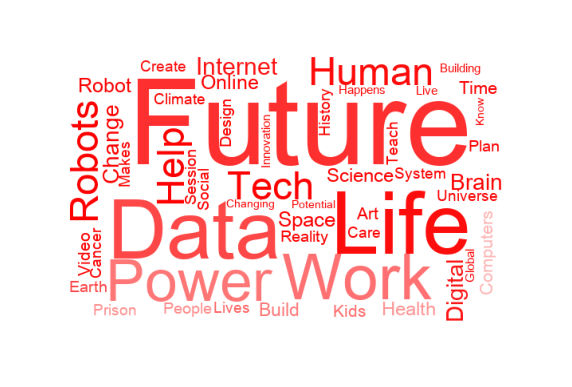

In [88]:
from wordcloud import ImageColorGenerator    # 색 추출 가져오기

cloud_img = plt.imread('rectangle.jpg')    # 모서리가 둥근 사각형 이미지

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                     background_color='white',
                     random_state = 2,    # 비교하기 쉽게 지정
                     color_func = ImageColorGenerator(cloud_img),
                     mask = cloud_img,
                     max_words=100,
                     max_font_size=150,
                     width=1200,
                     height=630)

cloud = wordcloud.generate_from_frequencies(dict(topic_words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()

### 함수 호출

In [4]:
title_list_2 = []
topic2_select = input("주제:")
web_scraping_2(topic2_select)

주제:Design
[<a class=" ga-link" data-ga-context="talks" href="/talks/matthew_mazzotta_playful_wondrous_public_spaces_built_for_community_and_possibility">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="289" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/e221f0c5-860c-43f6-93ea-242fca6d76f5/MatthewMazzotta_2021F-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 4:49</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/matthew_mazzotta_playful_wondrous_public_spaces_built_for_community_and_possibility">
Playful, wondrous public spaces built for community and possibility
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jorge_manes_rubio_what_should_humans_take_to_space_and_leave_behind">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer

[<a class=" ga-link" data-ga-context="talks" href="/talks/paola_antonelli_why_pasta_comes_in_all_shapes_and_sizes">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="203" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/5a9bcab6-6def-48ee-afaa-c5318d86cbc4/PaolaAntonelli_2020V-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 3:23</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/paola_antonelli_why_pasta_comes_in_all_shapes_and_sizes">
Why pasta comes in all shapes and sizes
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/debbie_millman_how_symbols_and_brands_shape_our_humanity">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="852" src="https://pi.tedc

[<a class=" ga-link" data-ga-context="talks" href="/talks/kotchakorn_voraakhom_how_to_transform_sinking_cities_into_landscapes_that_fight_floods">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="750" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/541d915a-559f-43d0-be04-8f2f8d960c3c/KotchakornVoraakhom_2016W-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:30</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/kotchakorn_voraakhom_how_to_transform_sinking_cities_into_landscapes_that_fight_floods">
How to transform sinking cities into landscapes that fight floods
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rebecca_love_how_nurses_can_help_drive_healthcare_innovation">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span c

[<a class=" ga-link" data-ga-context="talks" href="/talks/isaac_mizrahi_how_the_button_changed_fashion">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="140" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/e3a61d5e-e693-4e9c-ae4d-a86027c44091/IsaacMizrahi_2018V-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 2:20</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/isaac_mizrahi_how_the_button_changed_fashion">
How the button changed fashion
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/paola_antonelli_the_3_000_year_history_of_the_hoodie">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="212" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws

[<a class=" ga-link" data-ga-context="talks" href="/talks/shohini_ghose_the_genius_of_marie_curie">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="283" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/8b09061a-8c91-422b-b505-095fee56afec/235_curie_1.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 4:43</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/shohini_ghose_the_genius_of_marie_curie">
The genius of Marie Curie
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/netta_schramm_why_don_t_perpetual_motion_machines_ever_work">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="310" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/2cb19765

[<a class=" ga-link" data-ga-context="talks" href="/talks/marwa_al_sabouni_how_syria_s_architecture_laid_the_foundation_for_brutal_war">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="625" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/4e40806e-0688-4e4e-9eaa-33aa169bc3d8/MarwaAlAbouni_2016V-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">10:25</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/marwa_al_sabouni_how_syria_s_architecture_laid_the_foundation_for_brutal_war">
How Syria's architecture laid the foundation for brutal war
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/tom_hulme_what_can_we_learn_from_shortcuts">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__im

[<a class=" ga-link" data-ga-context="talks" href="/talks/emma_bridgewater_how_an_entrepreneurial_potter_helped_restore_beauty_to_a_city">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="896" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/309f7f28-bce5-441f-9bbb-15e38b1bdaf3/EmmaBridgewater_2015S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:56</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/emma_bridgewater_how_an_entrepreneurial_potter_helped_restore_beauty_to_a_city">
How an entrepreneurial potter helped restore beauty to a city
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/alex_gendler_can_you_solve_the_bridge_riddle">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class="

[<a class=" ga-link" data-ga-context="talks" href="/talks/bran_ferren_to_create_for_the_ages_let_s_combine_art_and_engineering">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1212" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/5ffae105-e983-41c1-add7-ef13abc81521/BranFerren_2014-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">20:12</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bran_ferren_to_create_for_the_ages_let_s_combine_art_and_engineering">
To create for the ages, let's combine art and engineering
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/molly_stevens_a_new_way_to_grow_bone">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="892" 

[<a class=" ga-link" data-ga-context="talks" href="/talks/amos_winter_the_cheap_all_terrain_wheelchair">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="674" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/23319dea-5ed4-4afa-bff2-edc476974ba5/AmosWinter_2012X-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">11:14</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/amos_winter_the_cheap_all_terrain_wheelchair">
The cheap all-terrain wheelchair
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/leah_buechley_how_to_sketch_with_electronics">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="393" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/upl

[<a class=" ga-link" data-ga-context="talks" href="/talks/lisa_harouni_a_primer_on_3d_printing">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="889" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/4182ccb0-c2c3-430e-8ac4-f1ba45eed7a3/LisaHarouni_2011S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:49</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/lisa_harouni_a_primer_on_3d_printing">
A primer on 3D printing
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sonaar_luthra_meet_the_water_canary">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="217" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/f4a34816481a61de16753f720db4d7609dc4eb9e_800

[<a class=" ga-link" data-ga-context="talks" href="/talks/dennis_hong_making_a_car_for_blind_drivers">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="548" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/8dd859696a6c640e7ee3c0feaa3d3d16f647334b_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 9:08</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/dennis_hong_making_a_car_for_blind_drivers">
Making a car for blind drivers
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/aaron_koblin_visualizing_ourselves_with_crowd_sourced_data">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1098" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/09b48ca5-7f84

[<a class=" ga-link" data-ga-context="talks" href="/talks/seth_godin_this_is_broken">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1214" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/197995_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">20:14</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/seth_godin_this_is_broken">
This is broken
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/alwar_balasubramaniam_art_of_substance_and_absence">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1011" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/197283_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration

[<a class=" ga-link" data-ga-context="talks" href="/talks/pranav_mistry_the_thrilling_potential_of_sixthsense_technology">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="830" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/565a3ead73aaf1781d6eff7a25615cd3de7920cf_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:50</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/pranav_mistry_the_thrilling_potential_of_sixthsense_technology">
The thrilling potential of SixthSense technology
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/edward_burtynsky_photographing_the_landscape_of_oil">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="220" src="https://pi.tedcdn.com/r/pe

[<a class=" ga-link" data-ga-context="talks" href="/talks/aimee_mullins_my_12_pairs_of_legs">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="598" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/d3d18f76c4b3928cc0b9c603cac4202c9747d93f_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 9:58</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/aimee_mullins_my_12_pairs_of_legs">
My 12 pairs of legs
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/pattie_maes_pranav_mistry_meet_the_sixthsense_interaction">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="522" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/8dde774d-1cd1-435f-9f6f-4f0c6019f9be/Patti

[<a class=" ga-link" data-ga-context="talks" href="/talks/stefan_sagmeister_things_i_ve_learned_in_my_life_so_far">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="285" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/aadaed12-9dd4-44e6-b149-cfa9c154d5a9/StefanSagmeister_2008-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 4:45</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/stefan_sagmeister_things_i_ve_learned_in_my_life_so_far">
Things I've learned in my life so far
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/rodney_brooks_robots_will_invade_our_lives">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1127" src="https://pi.tedcdn.com/r/pe.te

[<a class=" ga-link" data-ga-context="talks" href="/talks/philippe_starck_design_and_destiny">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1026" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/181f9eaeb985860a4e3f4c0e14062dca48896261_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:06</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/philippe_starck_design_and_destiny">
Design and destiny
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ron_eglash_the_fractals_at_the_heart_of_african_designs">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1017" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/d1879f00-4185-45dd-ab93-b7ca917c8ebe/RonE

[<a class=" ga-link" data-ga-context="talks" href="/talks/ross_lovegrove_organic_design_inspired_by_nature">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1170" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/fc59fdf3b9364bf5de442e9ab1d6b7ae9b11c6e2_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">19:30</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ross_lovegrove_organic_design_inspired_by_nature">
Organic design, inspired by nature
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/amy_smith_simple_designs_to_save_a_life">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="906" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/1451_480x360.jpg?quality=89&am

### 길이 확인

In [5]:
print(len(title_list_2))

1164


### 소문자 통일

In [7]:
make_lower = []
for i in title_list_2:
    make_lower.append(i.lower())    # 알파벳을 소문자로 변환
    
topic2_select = topic2_select.lower()    # 불용어로 지정하기 위해 소문자로 통일
title_list_2 = make_lower     # 기존의 리스트에 넣음

### 형태소 분석

In [8]:
kkma = Kkma()

sentences_tag_2 = []

for sentence in title_list_2:
    word_tag_2 = kkma.pos(sentence)
    sentences_tag_2.append(word_tag_2)

print(sentences_tag_2)

[[('4', 'NR'), (':', 'SP'), ('49', 'NR')], [('playful', 'OL'), (',', 'SP'), ('wondrous', 'OL'), ('public', 'OL'), ('spaces', 'OL'), ('built', 'OL'), ('for', 'OL'), ('community', 'OL'), ('and', 'OL'), ('possibility', 'OL')], [('9', 'NR'), (':', 'SP'), ('16', 'NR')], [('what', 'OL'), ('should', 'OL'), ('humans', 'OL'), ('take', 'OL'), ('to', 'OL'), ('space', 'OL'), ('(', 'SS'), ('and', 'OL'), ('leave', 'OL'), ('behind', 'OL'), (')', 'SS'), ('?', 'SF')], [('4', 'NR'), (':', 'SP'), ('57', 'NR')], [('how', 'OL'), ('one', 'OL'), ('design', 'OL'), ('flaw', 'OL'), ('almost', 'OL'), ('toppled', 'OL'), ('a', 'OL'), ('skyscraper', 'OL')], [('5', 'NR'), (':', 'SP'), ('15', 'NR')], [('demolition', 'OL'), (',', 'SP'), ('disease', 'OL'), (',', 'SP'), ('and', 'OL'), ('death', 'OL'), (':', 'SP'), ('building', 'OL'), ('the', 'OL'), ('panama', 'OL'), ('canal', 'OL')], [('4', 'NR'), (':', 'SP'), ('44', 'NR')], [('how', 'OL'), ('do', 'OL'), ('wind', 'OL'), ('turbines', 'OL'), ('work', 'OL'), ('?', 'SF')], 

### 명사 추출과 불필요한 단어 제거

In [14]:
noun_list_2 = []
# 트렌드 파악에 불필요한 단어 리스트
exclude = ['the','my','myself', 'we','our','ourselves','you','yourself','ideas','themselves', 'string',
           'what','which', 'who','whom','this', 'that', 'they', 'does', 'these', 'those','made', 'way', 
           'are', 'was', 'were', 'have', 'has', 'had', 'having', "that'll",'did','things','the', 'and',
           'but','because', 'until','while','are','for', 'with', 'about','against','between','through',
           'during', 'before','need','see','after','above','below', 'from','down','out','over','world',
           'under','again', 'further','then', 'wish','here', 'there','when', 'where','why','how','you',
           'all', 'any', 'both', 'use', 'ways', 'more','most', 'other', 'some', 'such','no', 'learned',
           'not', 'only', 'own','same', 'than','too', 'very','can', 'will','just','your','being','nor',
           'into',"don't", 'should', "should've", 'now', 'new', 'aren', "aren't", 'how', 'what','make',
           "didn't", "doesn't", 'turn','get', 'haven', "haven't", 'here', 'let','this','like', 'doing',
           'ted', 'mightn', 'you', 'let', 'one', 'why', 'new', 'could', 'can', 'good', 'better', 'end',
           'fight', 'meet', 'don', 'think', 'inside', 'look', 'next','take','every','without','behind',
           'them','want','great','makes',]

for sentence in sentences_tag_2:
    for word, tag in sentence:
        if tag in ['OL']: 
            noun_list_2.append(word)    # 명사만 추출

noun_list_2 = [x for x in noun_list_2 if x not in exclude]    # 불필요한 단어 제거

exclude_topic = [topic2_select, topic2_select+'s']    # topic과 topic 복수형 제거
noun_list_2 = [x for x in noun_list_2 if x not in exclude_topic]

print(noun_list_2)


['playful', 'wondrous', 'public', 'spaces', 'built', 'community', 'possibility', 'humans', 'to', 'space', 'leave', 'flaw', 'almost', 'toppled', 'a', 'skyscraper', 'demolition', 'disease', 'death', 'building', 'panama', 'canal', 'do', 'wind', 'turbines', 'work', 's', 'tallest', 'skyscraper', 'built', 'trapped', 'in', 'valley', 'of', 'death', 'to', 'rescue', 'map', 'is', 'wrong', 'possible', 'futures', 'intersection', 'of', 'nature', 'tech', 'society', 's', 'best', 'fuel', 'car', 'power', 'of', 'spaces', 'much', 'electricity', 'it', 'to', 'power', 'bren', 'brown', 'steps', 'to', 'designing', 'life', 'if', 'satellite', 'suddenly', 'disappeared', 'a', 'stealthy', 'reimagining', 'of', 'urban', 'public', 'space', 'building', 's', 'largest', 'controversial', 'power', 'plant', 'bag', 'create', 'perfect', 'farm', 'machine', 'a', 'coder', 'ep', 'game', 'help', 'schooling', 'to', 'build', 'a', 'resilient', 'future', 'using', 'ancient', 'wisdom', 'designing', 'justice', 'organizations', 'create', 

### 두음절 이상의 단어 추출

In [15]:
print('▶ 전체 명사의 수 = ', len(noun_list_2))
print() 

noun_list_2 = [word for word in noun_list_2 if len(word) > 2]    # 명사중에서 두음절 이상의 단어 추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list_2))
print() 

print(noun_list_2[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  2496

▶ 두음절 이상의 명사의 수 =  1892

['playful', 'wondrous', 'public', 'spaces', 'built', 'community', 'possibility', 'humans', 'space', 'leave', 'flaw', 'almost', 'toppled', 'skyscraper', 'demolition', 'disease', 'death', 'building', 'panama', 'canal', 'wind', 'turbines', 'work', 'tallest', 'skyscraper', 'built', 'trapped', 'valley', 'death', 'rescue', 'map', 'wrong', 'possible', 'futures', 'intersection', 'nature', 'tech', 'society', 'best', 'fuel', 'car', 'power', 'spaces', 'much', 'electricity', 'power', 'bren', 'brown', 'steps', 'designing', 'life', 'satellite', 'suddenly', 'disappeared', 'stealthy', 'reimagining', 'urban', 'public', 'space', 'building', 'largest', 'controversial', 'power', 'plant', 'bag', 'create', 'perfect', 'farm', 'machine', 'coder', 'game', 'help', 'schooling', 'build', 'resilient', 'future', 'using', 'ancient', 'wisdom', 'designing', 'justice', 'organizations', 'create', 'safe', 'inviting', 'workplaces', 'returning', 'employees', 'flags', 'unite', 'd

### 앞글자만 대문자로 변환

**워드 클라우드 만들 때 보기 편함**

In [17]:
make_cap = []
for i in noun_list_2:
    make_cap.append(i.capitalize())    # 시작만 대문자로 변환
    
noun_list_2 = make_cap

### 단어 출현 횟수 확인

**topic이라 topic_words로 지정**

In [18]:
counts = Counter(noun_list_2)

topic_words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(topic_words)

[('Future', 25), ('Art', 20), ('Life', 19), ('Architecture', 17), ('Robots', 15), ('City', 14), ('Building', 13), ('Build', 11), ('Human', 11), ('Power', 10), ('Fashion', 10), ('Space', 9), ('Nature', 9), ('Technology', 9), ('People', 9), ('Cities', 8), ('Story', 8), ('Genius', 8), ('Beauty', 8), ('Built', 7), ('Work', 7), ('Data', 7), ('Designing', 6), ('Architectural', 6), ('Computer', 6), ('Making', 6), ('Creative', 6), ('History', 6), ('Robot', 6), ('Community', 5), ('Tech', 5), ('Create', 5), ('Game', 5), ('Help', 5), ('Using', 5), ('Ancient', 5), ('Grow', 5), ('Potential', 5), ('Buildings', 5), ('Video', 5), ('Games', 5), ('Simple', 5), ('Invention', 5), ('Kids', 5), ('Playful', 4), ('Spaces', 4), ('Wonder', 4), ('Helped', 4), ('Transform', 4), ('Lego', 4)]


### Word Cloud 생성

**TED의 색을 넣고 보기 좋게 둥근 사각형으로 처리**

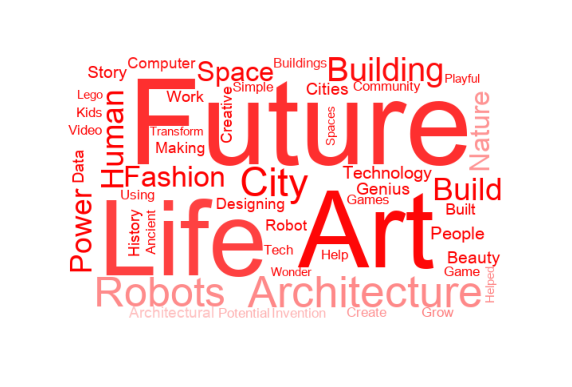

In [19]:
from wordcloud import ImageColorGenerator    # 색 추출 가져오기
### 함수 호출
cloud_img = plt.imread('rectangle.jpg')    # 모서리가 둥근 사각형 이미지

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                     background_color='white',
                     random_state = 2,    # 비교하기 쉽게 지정
                     color_func = ImageColorGenerator(cloud_img),
                     mask = cloud_img,
                     max_words=100,
                     max_font_size=150,
                     width=1200,
                     height=630)

cloud = wordcloud.generate_from_frequencies(dict(topic_words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()

### 함수 호출

In [3]:
title_list_2 = []
topic3_select = input("주제:")
web_scraping_2(topic3_select)

주제:Global issues
[<a class=" ga-link" data-ga-context="talks" href="/talks/feras_fayyad_the_real_life_superheroes_helping_syrian_refugees">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="393" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/e86ecd4c-5a34-48a7-9c3c-354744682562/FerasFayyad_2021F-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 6:33</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/feras_fayyad_the_real_life_superheroes_helping_syrian_refugees">
The real-life superheroes helping Syrian refugees
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/steven_allison_earth_s_original_inhabitants_and_their_role_in_combating_climate_change">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt

[<a class=" ga-link" data-ga-context="talks" href="/talks/kristen_wenz_what_if_a_single_human_right_could_change_the_world">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="494" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/37b3e33c-f52c-4a1c-8efd-25b8a5f82906/KristenWenz_2019S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 8:14</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/kristen_wenz_what_if_a_single_human_right_could_change_the_world">
What if a single human right could change the world?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/maria_neira_this_is_your_brain_on_air_pollution">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="772" s

[<a class=" ga-link" data-ga-context="talks" href="/talks/maryn_mckenna_antibiotics_changed_our_food_here_s_how_to_change_it_back">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="749" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/d60e7005-2ce7-4fbc-a1f4-404e0a3e3ffe/Maryn+McKenna.jpeg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">12:29</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/maryn_mckenna_antibiotics_changed_our_food_here_s_how_to_change_it_back">
Antibiotics changed our food. Here's how to change it back
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/darrick_hamilton_how_baby_bonds_could_help_close_the_wealth_gap">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__ima

[<a class=" ga-link" data-ga-context="talks" href="/talks/naomi_klein_how_shocking_events_can_spark_positive_change">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="935" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/97f91906-86b7-439f-94fe-a824b85010fc/NaomiKlein_2017G-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">15:35</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/naomi_klein_how_shocking_events_can_spark_positive_change">
How shocking events can spark positive change
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/robert_hakiza_refugees_want_empowerment_not_handouts">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="405" src="https://pi.te

[<a class=" ga-link" data-ga-context="talks" href="/talks/ashley_judd_how_online_abuse_of_women_has_spiraled_out_of_control">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="970" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/7bfa6dde-9c97-4c27-a5ec-8e020bd1e40c/AshleyJudd_2016W-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:10</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/ashley_judd_how_online_abuse_of_women_has_spiraled_out_of_control">
How online abuse of women has spiraled out of control
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sisonke_msimang_if_a_story_moves_you_act_on_it">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="766" 

[<a class=" ga-link" data-ga-context="talks" href="/talks/arthur_brooks_a_conservative_s_plea_let_s_work_together">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="854" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/402bae1f-d08a-46ee-a218-24576037b930/ArthurBrooks_2016-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:14</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/arthur_brooks_a_conservative_s_plea_let_s_work_together">
A conservative's plea: Let's work together
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/tshering_tobgay_this_country_isn_t_just_carbon_neutral_it_s_carbon_negative">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1134" 

[<a class=" ga-link" data-ga-context="talks" href="/talks/bill_gates_the_next_outbreak_we_re_not_ready">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="512" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/2c60223169fd66d3962f9f3c354081824d2914c5_2880x1620.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 8:32</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/bill_gates_the_next_outbreak_we_re_not_ready">
The next outbreak? We're not ready
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/vincent_cochetel_i_was_held_hostage_for_317_days_here_s_what_i_thought_about">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1187" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/9

[<a class=" ga-link" data-ga-context="talks" href="/talks/michael_metcalfe_we_need_money_for_aid_so_let_s_print_it">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="864" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/06ae5e24-9154-4938-9f2c-48d7655112ea/MichaelMetcalfe_2013S-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">14:24</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/michael_metcalfe_we_need_money_for_aid_so_let_s_print_it">
We need money for aid. So let’s print it.
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/lian_pin_koh_a_drone_s_eye_view_of_conservation">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="810" src="https://pi.tedcdn.c

[<a class=" ga-link" data-ga-context="talks" href="/talks/dan_pallotta_the_way_we_think_about_charity_is_dead_wrong">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1134" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/d5577fdfa6524f0b91a00fd8d9df84810fb5a10c_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">18:54</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/dan_pallotta_the_way_we_think_about_charity_is_dead_wrong">
The way we think about charity is dead wrong
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jennifer_granholm_a_clean_energy_proposal_race_to_the_top">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="761" src="https://pi.tedcdn.com/r/pe.tedcdn

[<a class=" ga-link" data-ga-context="talks" href="/talks/james_stavridis_a_navy_admiral_s_thoughts_on_global_security">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1003" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/1903aba42bb55daa9da99000e6456d728e7d01e1_1600x1200.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">16:43</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/james_stavridis_a_navy_admiral_s_thoughts_on_global_security">
A Navy Admiral's thoughts on global security
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/vinay_venkatraman_technology_crafts_for_the_digitally_underserved">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="848" src="https://pi.tedcdn.c

[<a class=" ga-link" data-ga-context="talks" href="/talks/mike_degruy_hooked_by_an_octopus">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1092" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/163962_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">18:12</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/mike_degruy_hooked_by_an_octopus">
Hooked by an octopus
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/erica_frenkel_the_universal_anesthesia_machine">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="683" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/6e246822fdfb4a19f9b03dca1109693160610c96_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner">

[<a class=" ga-link" data-ga-context="talks" href="/talks/maajid_nawaz_a_global_culture_to_fight_extremism">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1073" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/0409b24f-5ad0-478f-8073-c53f07a4c210/MaajidNawaz_2011G-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:53</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/maajid_nawaz_a_global_culture_to_fight_extremism">
A global culture to fight extremism
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/camille_seaman_haunting_photos_of_polar_ice">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="251" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazo

[<a class=" ga-link" data-ga-context="talks" href="/talks/david_bismark_e_voting_without_fraud">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="422" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/210355_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration"> 7:02</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/david_bismark_e_voting_without_fraud">
E-voting without fraud
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/joseph_nye_global_power_shifts">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1095" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/209889_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb_

[<a class=" ga-link" data-ga-context="talks" href="/talks/peter_eigen_how_to_expose_the_corrupt">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1021" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/147769_800x600.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:01</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/peter_eigen_how_to_expose_the_corrupt">
How to expose the corrupt
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/sendhil_mullainathan_solving_social_problems_with_a_nudge">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1081" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/93b80214-af2d-4ff0-9a16-9de4773f7f4e/SendhilMullainathan_2009I

[<a class=" ga-link" data-ga-context="talks" href="/talks/dan_ariely_are_we_in_control_of_our_own_decisions">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1046" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/bc922644-09d4-47e6-b6e1-c0afb84d050c/DanAriely_2008P-embed.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">17:26</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/dan_ariely_are_we_in_control_of_our_own_decisions">
Are we in control of our own decisions?
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/nandan_nilekani_ideas_for_india_s_future">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="919" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amaz

[<a class=" ga-link" data-ga-context="talks" href="/talks/eve_ensler_what_security_means_to_me">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="825" src="https://pi.tedcdn.com/r/pe.tedcdn.com/images/ted/30055_480x360.jpg?quality=89&amp;w=320"/><span class="thumb__aligner"></span></span></span><span class="thumb__duration">13:45</span></span>
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/eve_ensler_what_security_means_to_me">
What security means to me
</a>, <a class=" ga-link" data-ga-context="talks" href="/talks/jonathan_haidt_the_moral_roots_of_liberals_and_conservatives">
<span class="thumb thumb--video thumb--crop-top"><span class="thumb__sizer"><span class="thumb__tugger"><img alt="" class=" thumb__image" crop="top" play="1122" src="https://pi.tedcdn.com/r/talkstar-photos.s3.amazonaws.com/uploads/5720eac9-d3b3-46f8-855c-fba2ccffa96b/JonathanHaidt_2008-embed.j

### 길이 확인

In [4]:
print(len(title_list_2))

1152


### 소문자 통일

In [5]:
make_lower = []
for i in title_list_2:
    make_lower.append(i.lower())    # 알파벳을 소문자로 변환
    
topic3_select = topic3_select.lower()    # 불용어로 지정하기 위해 소문자로 통일
title_list_2 = make_lower     # 기존의 리스트에 넣음

### 형태소 분석

In [6]:
kkma = Kkma()

sentences_tag_3 = []

for sentence in title_list_2:
    word_tag_3 = kkma.pos(sentence)
    sentences_tag_3.append(word_tag_3)

print(sentences_tag_3)

[[('6', 'NR'), (':', 'SP'), ('33', 'NR')], [('the', 'OL'), ('real-life', 'OL'), ('superheroes', 'OL'), ('helping', 'OL'), ('syrian', 'OL'), ('refugees', 'OL')], [('10', 'NR'), (':', 'SP'), ('28', 'NR')], [('earth', 'OL'), ("'", 'SS'), ('s', 'OL'), ('original', 'OL'), ('inhabitants', 'OL'), ('—', 'SW'), ('and', 'OL'), ('their', 'OL'), ('role', 'OL'), ('in', 'OL'), ('combating', 'OL'), ('climate', 'OL'), ('change', 'OL')], [('14', 'NR'), (':', 'SP'), ('08', 'NR')], [('3', 'NR'), ('ways', 'OL'), ('to', 'OL'), ('upgrade', 'OL'), ('democracy', 'OL'), ('for', 'OL'), ('the', 'OL'), ('21', 'NR'), ('st', 'OL'), ('century', 'OL')], [('10', 'NR'), (':', 'SP'), ('08', 'NR')], [('how', 'OL'), ('bad', 'OL'), ('data', 'OL'), ('keeps', 'OL'), ('us', 'OL'), ('from', 'OL'), ('good', 'OL'), ('ai', 'OL')], [('20', 'NR'), (':', 'SP'), ('00', 'NR')], [('financial', 'OL'), ('inclusion', 'OL'), (',', 'SP'), ('the', 'OL'), ('digital', 'OL'), ('divide', 'OL'), ('and', 'OL'), ('other', 'OL'), ('thoughts', 'OL'),

### 명사 추출과 불필요한 단어 제거

In [7]:
noun_list_3 = []
# 트렌드 파악에 불필요한 단어 리스트
exclude = ['the','my','myself', 'we','our','ourselves','you','yourself','ideas','themselves', 'string',
           'what','which', 'who','whom','this', 'that', 'they', 'does', 'these', 'those','made', 'way', 
           'are', 'was', 'were', 'have', 'has', 'had', 'having', "that'll",'did','things','the', 'and',
           'but','because', 'until','while','are','for', 'with', 'about','against','between','through',
           'during', 'before','need','see','after','above','below', 'from','down','out','over','world',
           'under','again', 'further','then', 'wish','here', 'there','when', 'where','why','how','you',
           'all', 'any', 'both', 'use', 'ways', 'more','most', 'other', 'some', 'such','no', 'learned',
           'not', 'only', 'own','same', 'than','too', 'very','can', 'will','just','your','being','nor',
           'into',"don't", 'should', "should've", 'now', 'new', 'aren', "aren't", 'how', 'what','make',
           "didn't", "doesn't", 'turn','get', 'haven', "haven't", 'here', 'let','this','like', 'doing',
           'ted', 'mightn', 'you', 'let', 'one', 'why', 'new', 'could', 'can', 'good', 'better', 'end',
           'fight', 'meet', 'don', 'think', 'inside', 'look', 'next','take','every','without','behind',
           'them','want','great','makes',]

for sentence in sentences_tag_3:
    for word, tag in sentence:
        if tag in ['OL']: 
            noun_list_3.append(word)    # 명사만 추출

noun_list_3 = [x for x in noun_list_3 if x not in exclude]    # 불필요한 단어 제거

exclude_topic = [topic3_select, topic3_select+'s']    # topic과 topic 복수형 제거
noun_list_3 = [x for x in noun_list_3 if x not in exclude_topic]

print(noun_list_3)

['real-life', 'superheroes', 'helping', 'syrian', 'refugees', 'earth', 's', 'original', 'inhabitants', 'their', 'role', 'in', 'combating', 'climate', 'change', 'to', 'upgrade', 'democracy', 'st', 'century', 'bad', 'data', 'keeps', 'us', 'ai', 'financial', 'inclusion', 'digital', 'divide', 'thoughts', 'on', 'future', 'of', 'money', 'quinoa', 'help', 'combat', 'hunger', 'malnutrition', 'is', 'running', 'of', 'water', 'tech', 'help', 'climate', 'change', 'is', 'becoming', 'a', 'problem', 'taste', 'an', 'indigenous', 'mixtape', 'lima', 'peru', 'post-pandemic', 'paradise', 'in', 'rapa', 'nui', 'racism', 'thrives', 'on', 'silence', 'speak', 'up', 'a', 'global', 'movement', 'to', 'solve', 'global', 'problems', 'steps', 'to', 'ending', 'extreme', 'poverty', 'to', 'grow', 'healthy', 'food', 'start', 'lawn', 'call', 'it', 'a', 'map', 'if', 'it', 's', 'missing', 'a', 'billion', 'people', 'to', 'build', 'a', 'resilient', 'future', 'using', 'ancient', 'wisdom', 'day', 'live', 'impact', 'planet', 'c

### 두음절 이상의 단어 추출

In [8]:
print('▶ 전체 명사의 수 = ', len(noun_list_3))
print() 

noun_list_3 = [word for word in noun_list_3 if len(word) > 2]    # 명사중에서 두음절 이상의 단어 추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list_3))
print() 

print(noun_list_3[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  2708

▶ 두음절 이상의 명사의 수 =  2009

['real-life', 'superheroes', 'helping', 'syrian', 'refugees', 'earth', 'original', 'inhabitants', 'their', 'role', 'combating', 'climate', 'change', 'upgrade', 'democracy', 'century', 'bad', 'data', 'keeps', 'financial', 'inclusion', 'digital', 'divide', 'thoughts', 'future', 'money', 'quinoa', 'help', 'combat', 'hunger', 'malnutrition', 'running', 'water', 'tech', 'help', 'climate', 'change', 'becoming', 'problem', 'taste', 'indigenous', 'mixtape', 'lima', 'peru', 'post-pandemic', 'paradise', 'rapa', 'nui', 'racism', 'thrives', 'silence', 'speak', 'global', 'movement', 'solve', 'global', 'problems', 'steps', 'ending', 'extreme', 'poverty', 'grow', 'healthy', 'food', 'start', 'lawn', 'call', 'map', 'missing', 'billion', 'people', 'build', 'resilient', 'future', 'using', 'ancient', 'wisdom', 'day', 'live', 'impact', 'planet', 'covid-19', 'crisis', 'chance', 'capitalism', 'differently', 'oberammergau', 'urgency', 'climate', 'change', 'colonial

### 앞글자만 대문자로 변환

**워드 클라우드 만들 때 보기 편함**

In [9]:
make_cap = []
for i in noun_list_3:
    make_cap.append(i.capitalize())    # 시작만 대문자로 변환
    
noun_list_3 = make_cap

### 단어 출현 횟수 확인

**topic이라 topic_words로 지정**

In [10]:
counts = Counter(noun_list_3)

topic_words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(topic_words)

[('Global', 32), ('Change', 23), ('Climate', 21), ('Future', 17), ('Power', 14), ('Help', 12), ('Food', 12), ('Women', 12), ('Health', 11), ('War', 11), ('Peace', 11), ('Refugees', 10), ('Democracy', 10), ('Compassion', 9), ('Life', 9), ('Crisis', 8), ('Education', 8), ('Story', 8), ('Poverty', 7), ('Real', 7), ('Case', 7), ('Human', 7), ('News', 7), ('Country', 7), ('Data', 6), ('Economy', 6), ('Violence', 6), ('Africa', 6), ('Economic', 6), ('Plastic', 6), ('China', 6), ('Young', 6), ('Work', 6), ('Web', 6), ('People', 5), ('Live', 5), ('Love', 5), ('Coronavirus', 5), ('City', 5), ('Nuclear', 5), ('Needs', 5), ('Lives', 5), ('Talk', 5), ('Survive', 5), ('Care', 5), ('Fix', 5), ('Science', 5), ('Hiv', 5), ('Bad', 4), ('Money', 4)]


### Word Cloud 생성

**TED의 색을 넣고 보기 좋게 둥근 사각형으로 처리**

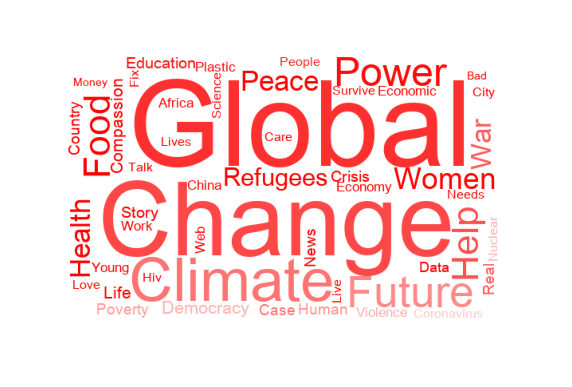

In [11]:
from wordcloud import ImageColorGenerator    # 색 추출 가져오기

cloud_img = plt.imread('rectangle.jpg')    # 모서리가 둥근 사각형 이미지

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                     background_color='white',
                     random_state = 2,    # 비교하기 쉽게 지정
                     color_func = ImageColorGenerator(cloud_img),
                     mask = cloud_img,
                     max_words=100,
                     max_font_size=150,
                     width=1200,
                     height=630)

cloud = wordcloud.generate_from_frequencies(dict(topic_words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()

# 결론

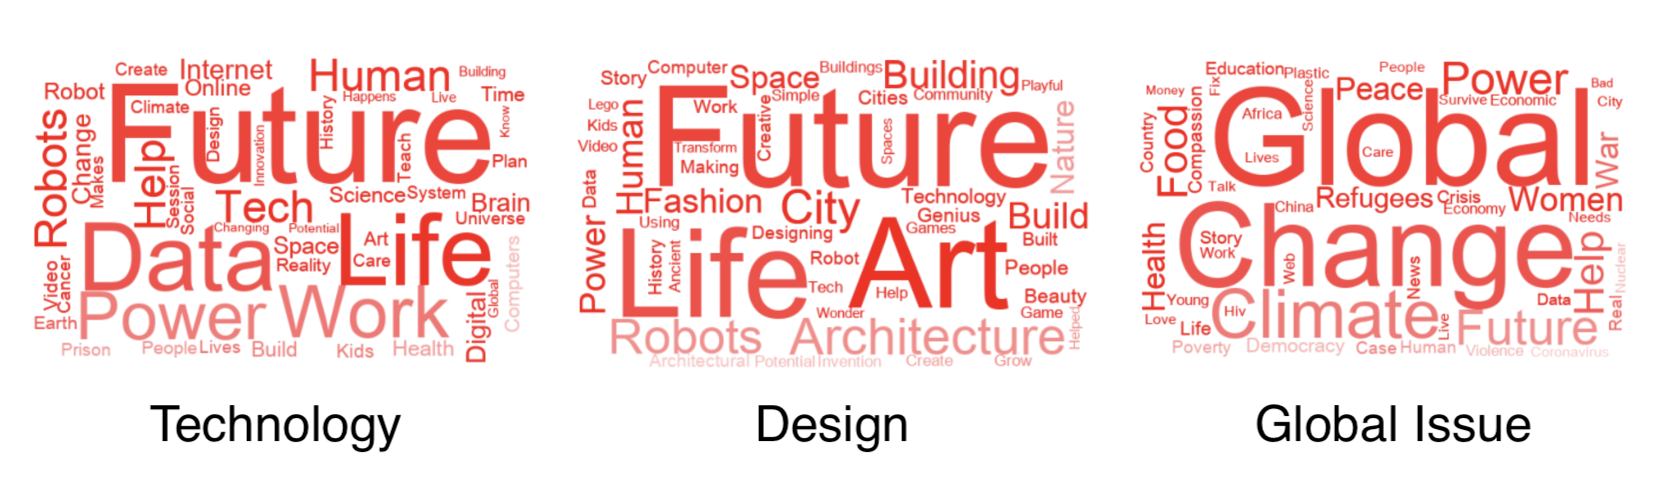

### 분야별 키워드 분석
* 기술과 디자인은 미래와 삶과 관련이 매우 높음 (Future, Life) 
* 기술 클라우드에 있는 단어가 디자인 클라우드에 있는 걸로 보아, 디자인은 기술과 밀접한 연관이 있음 (Robot, Build, Technology)
* 세계는 기후 변화에 매우 큰 관심이 있음 (Climate, Change, Plastic)
* 난민, 여성, 전쟁, 식량에 대한 이슈가 있다는 걸 알 수 있음 (Refugees, Women, War, Food)
* 홀로 등장한 국가명을 통해 전세계적으로 중국에 대해 할 말이 많은 것으로 보임 (China)

### 이와 같이 관심있는 분야에 대해 키워드를 분석할 수 있었음